<center><h1>Obradoiro: Como aprenden as máquinas a partir de datos: bloque 2</h1></center>

<center><img src="https://camelia.usc.gal/rs/logo-camelia-top.svg" width="600px"></center>
<br>
<center>Brais Castiñeiras ✉️ <a href= "mailto:brais.castineirasgaldo@plexus.es">brais.castineirasgaldo@plexus.es</a></center>
<center>Nicolás Vila ✉️ <a href= "mailto:nicolas.vila@usc.es">nicolas.vila@usc.es</a></center>

## Métodos avanzados de aprendizaje automático
El Machine Learning (ML) ha revolucionado el ámbito clínico, permitiendo el análisis de grandes volúmenes de datos para mejorar el diagnóstico, pronóstico y tratamiento de enfermedades. Tras haber explorado métodos más sencillos como la regresión lineal y la regresión logística, es momento de adentrarnos en técnicas más avanzadas: k-Nearest Neighbors (k-NN), árboles de decisión, random forest y redes de neuronal artificiales.

##k-Nearest Neighbors (k-NN)
El k-Nearest Neighbors (k-NN) es un algoritmo de clasificación que asigna una clase a un punto de datos basándose en las clases de sus k vecinos más cercanos. En el ámbito clínico, se utiliza para clasificar pacientes en diferentes grupos de riesgo o para predecir resultados basados en datos históricos. Es un aprendizaje basado en instancias.

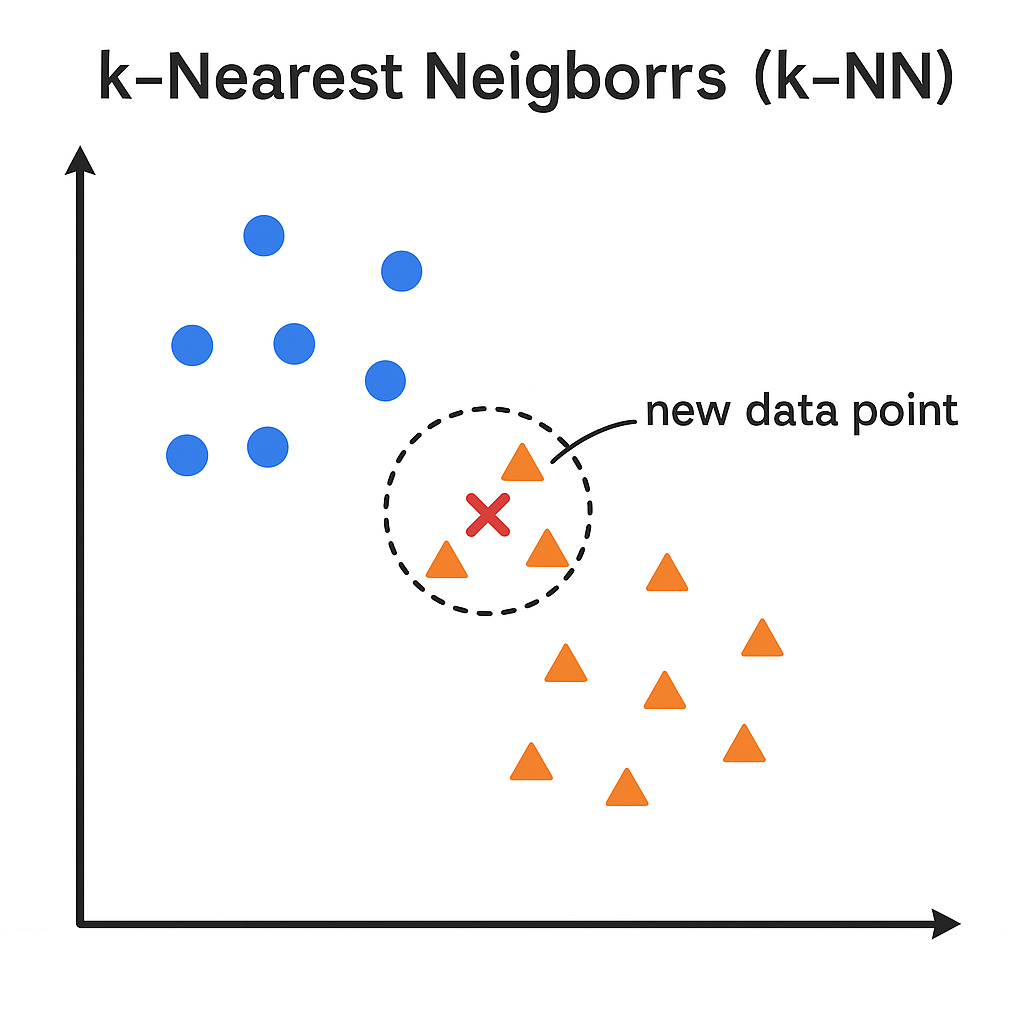

###Características Clave:
* Simplicidad: Fácil de entender e implementar.
* No Paramétrico: No hace suposiciones sobre la distribución de los datos.
* Distancia: Utiliza métricas como la distancia euclidiana.
* Aplicaciones Clínicas: Clasificación de pacientes, predicción de resultados clínicos.

##Árboles de Decisión y Random Forest
Los árboles de decisión utilizan una estructura de árbol para tomar decisiones basadas en características de los datos. Son muy valorados en el ámbito clínico por su interpretabilidad, lo que facilita la explicación de decisiones a profesionales de la salud.

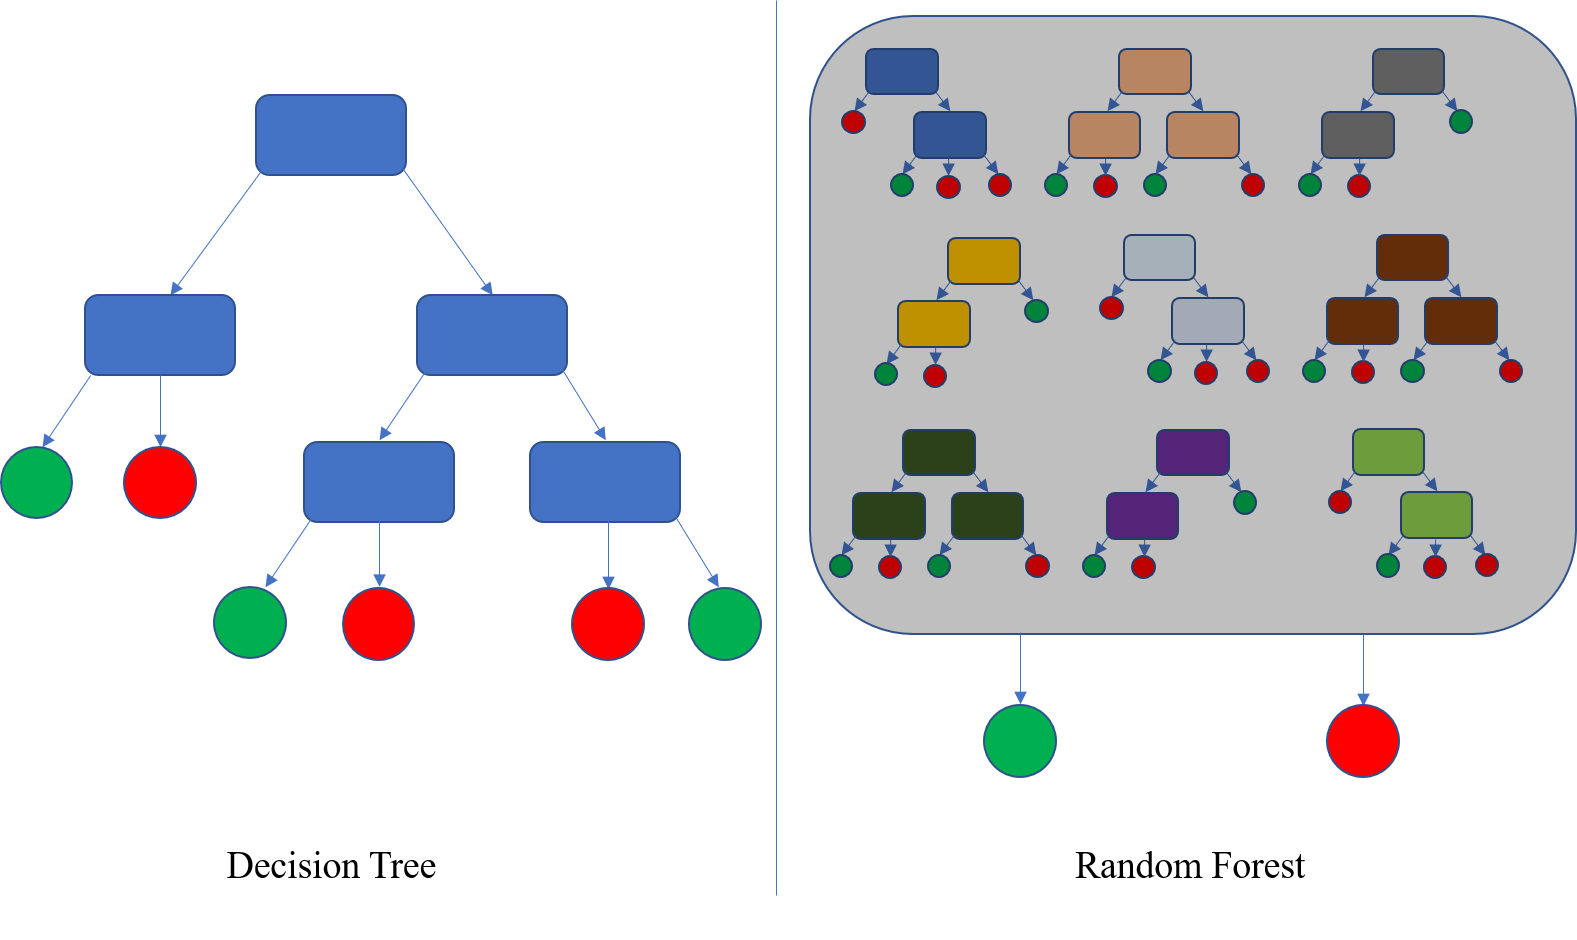

###Características Clave:
* Nodos: Representan características.
* Hojas: Representan decisiones finales.
* Ventajas: Interpretabilidad y facilidad de uso.
* Aplicaciones Clínicas: Diagnóstico de enfermedades, recomendación de tratamientos.


##Redes de Neuronas Artificiales
Las redes de neuronas artificiales o redes neuronales son modelos inspirados en el cerebro humano, compuestas por capas de neuronas artificiales que procesan la información. En el ámbito clínico, son especialmente útiles para tareas como la detección de anomalías en imágenes médicas y el análisis de secuencias genéticas.

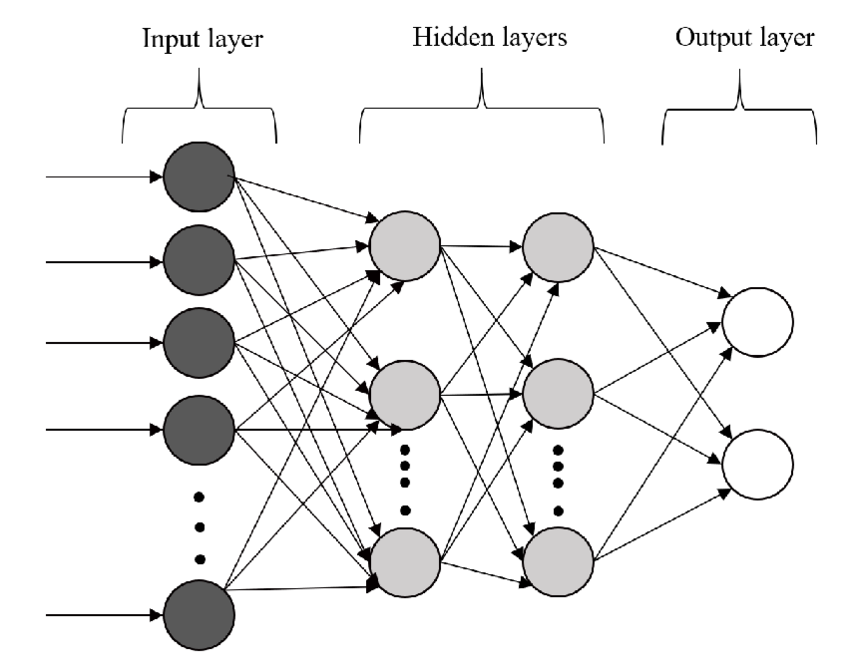

###Características Clave:
* Capas: Entrada, ocultas y salida.
* Activación: Funciones como ReLU, Sigmoid.
* Entrenamiento: Algoritmos como el backpropagation.
* Aplicaciones Clínicas: Diagnóstico por imágenes, predicción de enfermedades.

## Datasets a utilizar

Primeramente es necesario tener en cuenta los datasets a utilizar. Para este caso utilizaremos 2 conjuntos de datos de la página de UCI Machine Learning relacionados con el ámbito clínico:
* *Heart Disease* (https://archive.ics.uci.edu/dataset/45/heart+disease)
* *Breast Cancer* (https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

Estos conjuntos de datos clínicos son ampliamente utilizados y sirven para comprender el funcionamiento de los diferentes algoritmos.

## Metodología a usar: CRISP-DM

La metodología CRISP-DM (Cross-Industry Standard Process for Data Mining) es un marco de trabajo estandarizado para llevar a cabo proyectos de minería de datos y machine learning. Desarrollada a finales de los años 90 por un consorcio de empresas, esta metodología se compone de seis fases principales: comprensión del negocio, comprensión de los datos, preparación de los datos, modelado, evaluación y despliegue. Cada fase es iterativa, permitiendo revisiones y ajustes continuos para asegurar que el proyecto se alinee con los objetivos empresariales y técnicos.

En la fase de comprensión del negocio, se definen los objetivos y necesidades del proyecto desde una perspectiva empresarial. Luego, en la fase de comprensión de los datos, se recopilan y exploran los datos disponibles. La preparación de los datos implica limpiar y transformar los datos para su uso en modelos. En la fase de modelado, se seleccionan y entrenan los algoritmos adecuados. La evaluación mide el rendimiento del modelo y verifica si cumple con los objetivos del negocio. Finalmente, en la fase de despliegue, el modelo se implementa en producción y se monitoriza su rendimiento en tiempo real

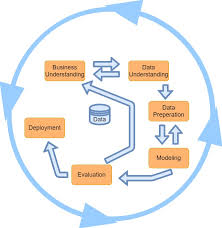

# Recogida de los datos

Estos datos se pueden recoger mediante la instalación de un paquete Python que da acceso a los diferentes conjuntos de datos.

In [ ]:
%pip install ucimlrepo

In [ ]:
# Base imports
import pandas as pd
import numpy as np
import json

# Split imports
from sklearn.model_selection import train_test_split

# Model imports
from sklearn.neural_network import MLPClassifier # Redes neuronales
from sklearn.tree import DecisionTreeClassifier # Árboles de decisión
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.ensemble import RandomForestClassifier # Bosque aleatorio

# Metric imports
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

# Plot imports
import seaborn as sns
import matplotlib.pyplot as plt

# Display results
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', 6)
pd.set_option('display.expand_frame_repr', False)

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)
heart_disease = fetch_ucirepo(id=45)

## Análisis de datos

Una vez obtenemos los datos de los diferentes datasets es necesario analizarlos teniendo en cuenta las diferentes variables que contienen.

Para no interferir en los diferentes datasets, las variables relativas al dataset de *Breast Cancer* comenzarán por b y las relativas al dataset de *Heart Disease* por h

In [ ]:
b_features = breast_cancer_wisconsin_diagnostic.data.features
b_targets = breast_cancer_wisconsin_diagnostic.data.targets
b_metadata = breast_cancer_wisconsin_diagnostic.metadata
b_variables = breast_cancer_wisconsin_diagnostic.variables

h_features = heart_disease.data.features
h_targets = heart_disease.data.targets
h_metadata = heart_disease.metadata
h_variables = heart_disease.variables

In [ ]:
print(f'breast_metadata: {json.dumps(b_metadata, indent=4)}')
print(f'breast_variables: {b_variables}')
print(f'{"-"*300}')
print(f'h_metadata: {json.dumps(h_metadata, indent=4)}')
print(f'h_variables: {h_variables}')

### Breast Cancer

A continuación realizaremos el proceso de análisis de datos extracción de características con este dataset. Primeramente tenemos que conocer la distribución de las variables.

In [ ]:
print(f'Obteniendo dataset entero....')
b_df = pd.concat([b_features, b_targets], axis=1)
b_target_col_name = 'Diagnosis'

print(f'Obteniendo diagnóstico maligno')
b_df_m = b_df.loc[b_df[b_target_col_name] == 'M']

print(f'Obteniendo diagnóstico benigno')
b_df_b = b_df.loc[b_df[b_target_col_name] == 'B']

print(f'Análisis de columnas')
for column in b_df.columns:
  b_concat_df = pd.concat([b_df[column].describe(), b_df_m[column].describe(), b_df_b[column].describe()], axis=1)
  b_concat_df.columns = ['Total', 'Maligno', 'Benigno']
  print(f'Columna: {column}')
  print(b_concat_df)

### Heart Disease

A continuación realizaremos la tarea análoga para el dataset de Heart Disease:

In [ ]:
print(f'Obteniendo dataset entero....')
h_df = pd.concat([h_features, h_targets], axis=1)
h_target_col_name = 'num'

print(f'Obteniendo Clase 0')
h_df_0 = h_df.loc[h_df[h_target_col_name] == 0]

print(f'Obteniendo Clase 1')
h_df_1 = h_df.loc[h_df[h_target_col_name] == 1]

print(f'Obteniendo Clase 2')
h_df_2 = h_df.loc[h_df[h_target_col_name] == 2]

print(f'Obteniendo Clase 3')
h_df_3 = h_df.loc[h_df[h_target_col_name] == 3]

print(f'Obteniendo Clase 4')
h_df_4 = h_df.loc[h_df[h_target_col_name] == 4]

print(f'Análisis de columnas:')
for column in h_df.columns:
  h_concat_df = pd.concat([h_df[column].describe(), h_df_0[column].describe(), h_df_1[column].describe(), h_df_2[column].describe(), h_df_3[column].describe(), h_df_4[column].describe()], axis=1)
  h_concat_df.columns = ['Total', 'Clase 0', 'Clase 1', 'Clase 2', 'Clase 3', 'Clase 4']
  print(f'Columna: {column}')
  print(h_concat_df)

## Normalización de columnas

Una vez tenemos extraídas las diferentes columnas de los conjuntos de datos es necesario proceder a su normalización. En este punto es necesario destacar que estos modelos solo aceptan tipos de datos numéricos, por lo que es necesario realizar una serie de transformaciones sobre los datos categóricos (One hot encoding).

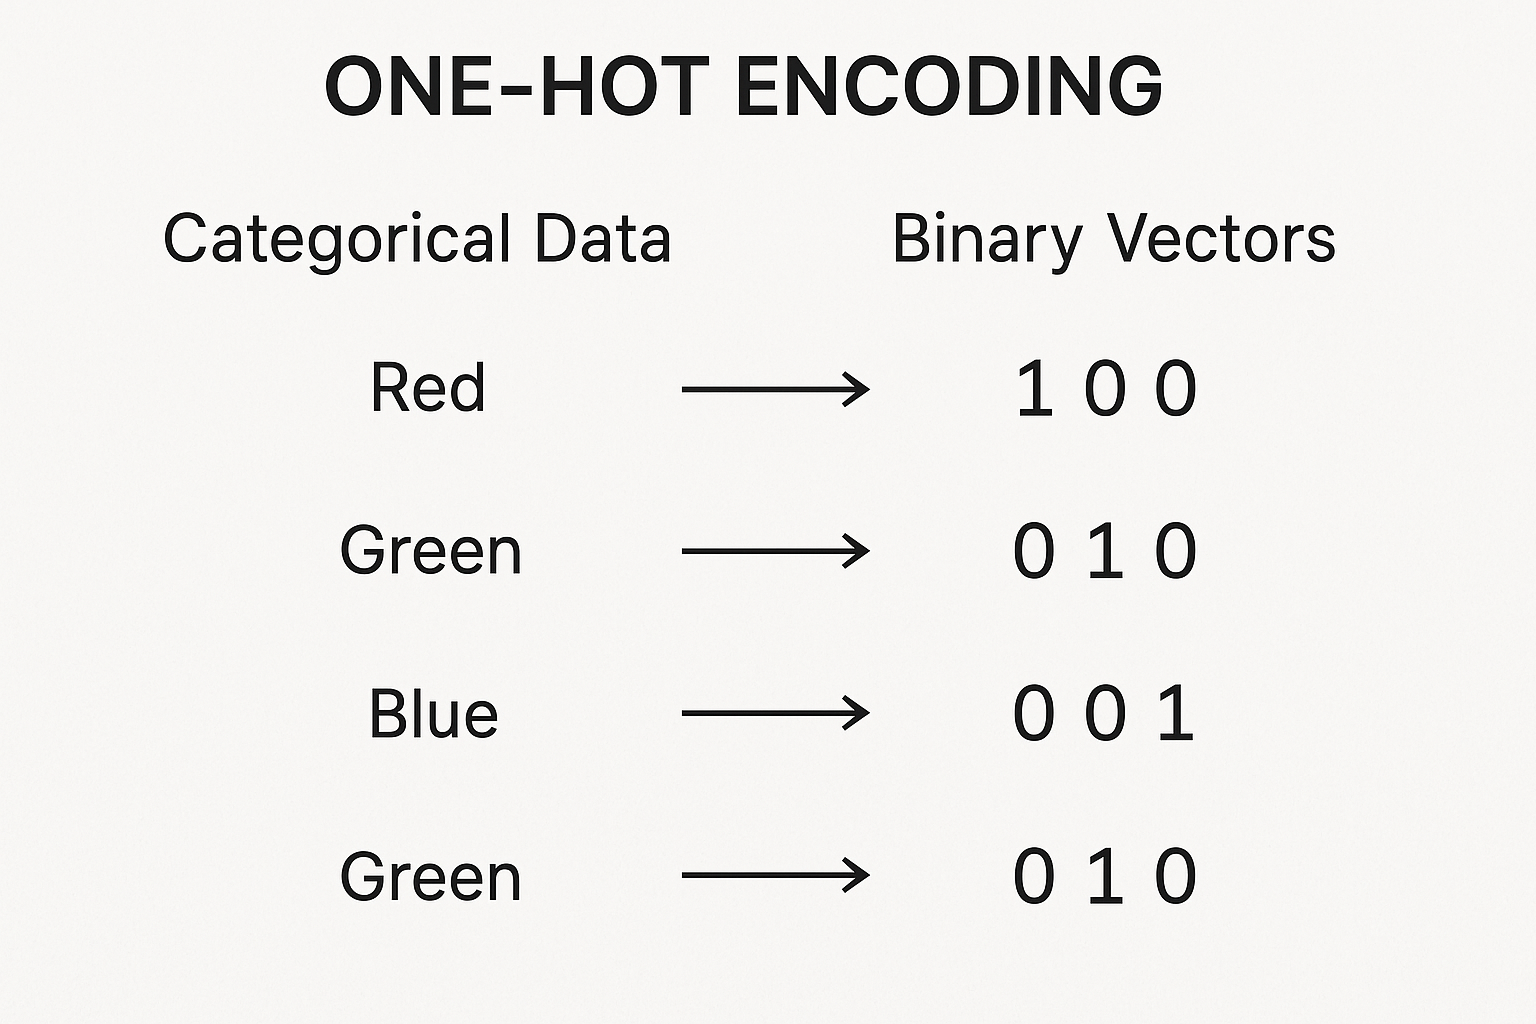

Es en este punto en el que se tiene que tener en cuenta la división. Para hacerlo lo más real posible, esta normalización se aplicará al conjunto de datos de entrenamiento y se extraerán los factores para realizarlos con los otros datasets y poder así extraer las métricas necesarias.

In [ ]:
def one_hot_encoding(df, column):
    unique_values = df[column].nunique()

    if unique_values == 2:
        df[column] = pd.get_dummies(df[column], drop_first=True)
    else:
        one_hot = pd.get_dummies(df[column], prefix=column)
        df = df.drop(column, axis=1)
        df = df.join(one_hot)

    return df

def min_max_normalization(df, column):
  min_value = df[column].min()
  max_value = df[column].max()
  df[column] = (df[column] - min_value) / (max_value - min_value)
  return df

def min_max_normalization_factors(df, column):
  min_value = df[column].min()
  max_value = df[column].max()
  return min_value, max_value

### Breast Cancer

A continuación realizaremos las normalizaciones relativas a este dataset.

In [ ]:
b_numerical_cols = b_df.select_dtypes(include=np.number).columns.tolist()
b_categorical_cols = b_df.select_dtypes(exclude=np.number).columns.tolist()

for col in b_numerical_cols:
  b_df = min_max_normalization(b_df, col)

for col in b_categorical_cols:
  b_df = one_hot_encoding(b_df, col)

print(b_df.head())
print(b_df.info())

### Heart Disease

En este dataset existen valores categóricos por lo que será necesario realizar tareas de one_hot_encoding.

In [ ]:
h_numerical_cols = h_df.select_dtypes(include=np.number).columns.tolist()
h_categorical_cols = h_df.select_dtypes(exclude=np.number).columns.tolist()

for col in h_numerical_cols:
  h_df = min_max_normalization(h_df, col)

for col in h_categorical_cols:
  h_df = one_hot_encoding(h_df, col)

print(h_df.head())
print(h_df.info())

## Extracción de características

Una vez tenemos este análisis realizado y hemos podido ver la distribución de los datos, nos centraremos en evaluar cuálies son las columnas más informativas para el dataset. Comenzaremos realizando un ranking y estas columnas serán las que se le ofrecerán al modelo a la hora de realizar el entrenamiento correspondiente.

### Breast Cancer

Primero comenzaremos con Breast Cancer para obtener las columnas más relevantes para realizar el análisis.

In [ ]:
b_correlation_matrix = b_df.corr()
b_correlation_with_target = b_correlation_matrix[b_target_col_name].sort_values(ascending=False)
print(f'Correlación con la columna objetivo ({b_target_col_name}):')
print(b_correlation_with_target)

# You can choose a threshold for correlation to select relevant columns
# For example, selecting columns with absolute correlation greater than 0.1
b_relevant_columns = b_correlation_with_target[abs(b_correlation_with_target) > 0.1].index.tolist()

# Also include the target column itself
if b_target_col_name not in b_relevant_columns:
    b_relevant_columns.append(b_target_col_name)

print(f'\nColumnas consideradas más relevantes para Breast Cancer:')
print(b_relevant_columns)

# Create a new DataFrame with only the relevant columns
b_df_relevant = b_df[b_relevant_columns]

print(f'\nDataFrame con columnas relevantes (primeras 5 filas):')
print(b_df_relevant.head())

### Heart Disease

A continuación realizamos la tarea análoga al dataset de heart disease.

In [ ]:
h_correlation_matrix = h_df.corr()
h_correlation_with_target = h_correlation_matrix[h_target_col_name].sort_values(ascending=False)
print(f'Correlación con la columna objetivo ({h_target_col_name}):')
print(h_correlation_with_target)

h_relevant_columns = h_correlation_with_target[abs(h_correlation_with_target) > 0.1].index.tolist()

if h_target_col_name not in h_relevant_columns:
    h_relevant_columns.append(h_target_col_name)

print(f'\nColumnas consideradas más relevantes para Heart Disease:')
print(h_relevant_columns)

h_df_relevant = h_df[h_relevant_columns]

print(f'\nDataFrame con columnas relevantes (primeras 5 filas):')
print(h_df_relevant.head())

## División en Conjuntos de Entrenamiento y Test
En el ámbito del machine learning, la correcta división de los datos en conjuntos de entrenamiento y test es crucial para evaluar el rendimiento de los modelos y evitar problemas como el sobreajuste. A continuación, exploraremos la importancia de cada uno de estos conjuntos y las diferentes formas de realizar esta división.

### Conjunto de Entrenamiento
El conjunto de entrenamiento es el subconjunto de datos utilizado para entrenar el modelo. Durante esta fase, el modelo aprende a identificar patrones y relaciones en los datos. Es esencial que este conjunto sea lo suficientemente grande y representativo para que el modelo pueda generalizar bien a nuevos datos.

### Conjunto de Test
El conjunto de test es un subconjunto de datos que se utiliza para evaluar el rendimiento final del modelo después de haber sido entrenado y ajustado. Este conjunto no debe ser utilizado durante el entrenamiento para asegurar una evaluación imparcial del modelo. El rendimiento en el conjunto de test proporciona una estimación de cómo se comportará el modelo en datos no vistos.

## Métodos de División
Existen varias formas de dividir los datos en estos conjuntos:

### División Simple (HoldOut)
La división simple es el método más básico, donde los datos se dividen en tres conjuntos de manera aleatoria. Por ejemplo, se puede asignar el 70% de los datos al conjunto de entrenamiento y el 30% al conjunto de test.

### Validación Cruzada (Cross-Validation)
La validación cruzada es una técnica más robusta que implica dividir los datos en k subconjuntos (folds). El modelo se entrena k veces, cada vez utilizando k-1 folds para el entrenamiento y el fold restante para la validación. Este proceso se repite k veces, y el rendimiento se promedia.

### Validación Cruzada Estratificada (Stratified Cross-Validation)
La validación cruzada estratificada es similar a la validación cruzada, pero asegura que cada fold tenga la misma proporción de clases que el conjunto de datos original. Esto es especialmente útil para conjuntos de datos desbalanceados.

## Ejemplos actuales
Para el caso que ataña ahora mismo a las bases de datos y el tiempo que tenemos en el seminario nos centraremos en la división más sencilla, el _HoldOut_.

In [ ]:
def analyze_distribution(train_data, test_data, target):
    """
    Analiza la distribución de la variable 'target' en los conjuntos de entrenamiento, validación y test.

    Args:
        train_data: DataFrame de entrenamiento.
        test_data: DataFrame de test.

    Returns:
        DataFrame con la distribución de 'target' en cada conjunto.
    """
    # Contar los patrones en cada conjunto
    train_counts = train_data[target].value_counts()
    test_counts = test_data[target].value_counts()

    # Obtener todos los posibles valores de target'
    all_values = sorted(set(train_counts.index).union(set(test_counts.index)))

    # Crear un DataFrame para mostrar los resultados
    division_df = pd.DataFrame(columns=['Dataset'] + all_values)

    # Añadir las filas para cada conjunto
    division_df.loc[0] = ['Train'] + [train_counts.get(value, 0) for value in all_values]
    division_df.loc[1] = ['Test'] + [test_counts.get(value, 0) for value in all_values]

    return division_df

### Breast Cancer

Primeramente realizaremos esta tarea de división de forma sencilla.

In [ ]:
b_df_relevant.dropna(inplace=True)

In [ ]:
# Ponemos una semilla para que siempre se divida de la misma forma. En este ejemplo se usará una división 70 - 30
b_train, b_test = train_test_split(b_df_relevant, test_size=0.3, random_state=42)

In [ ]:
# Es de destacar ver cómo ha sido la distribución por clases resultante a modo informativo
print(f'Tamaño del conjunto de entrenamiento: {len(b_train)}')
print(f'Tamaño del conjunto de test: {len(b_test)}')

print(f'Análisis de distribución:')
print(analyze_distribution(b_train, b_test, b_target_col_name))

### Heart Disease

Realizaremos la tarea análoga al dataset anterior

In [ ]:
# Estableceremos el mismo principio que en el caso anterior
h_train, h_test = train_test_split(h_df, test_size=0.3, random_state=42)

In [ ]:
# Es de destacar ver cómo ha sido la distribución por clases resultante a modo informativo
print(f'Tamaño del conjunto de entrenamiento: {len(h_train)}')
print(f'Tamaño del conjunto de test: {len(h_test)}')

print(f'Análisis de distribución:')
print(analyze_distribution(h_train, h_test, h_target_col_name))

# Definición de modelos

A continuación definiremos los modelos a tener en cuenta para la realización de los entrenamientos. Es necesario mencionar que para este punto usaremos la librería de sklearn con el objetivo de agilizar el proceso. Para cada uno de los modelos a tratar explicaremos los parámetros que utilicen y sea de vital importancia

## KNN

El algoritmo de k-vecinos más cercanos (KNN) es un método de clasificación que asigna una clase a un punto de datos basándose en las clases de sus k vecinos más cercanos en el espacio de características. Los principales hiperparámetros a ajustar en un modelo de KNN son:

* n_neighbors: Número de vecinos a considerar para la clasificación. Un valor más alto puede suavizar el modelo, mientras que un valor más bajo puede hacerlo más sensible a los datos de entrenamiento.
* weights: Función de ponderación utilizada en la predicción. Las opciones comunes son "uniform" (todos los vecinos tienen el mismo peso) y "distance" (los vecinos más cercanos tienen más peso).
algorithm: Algoritmo utilizado para calcular los vecinos más cercanos. Las opciones son "auto" (elige el mejor algoritmo basado en los datos), "ball_tree", "kd_tree" y "brute".
* leaf_size: Tamaño de la hoja pasada a BallTree o KDTree. Afecta la velocidad de construcción y consulta del árbol.
* p: Potencia del parámetro de la métrica de Minkowski. Cuando p=1, se usa la distancia de Manhattan, y cuando p=2, se usa la distancia euclidiana.
* metric: La métrica utilizada para la distancia. La opción por defecto es "minkowski", pero se pueden usar otras métricas como "euclidean", "manhattan", etc.

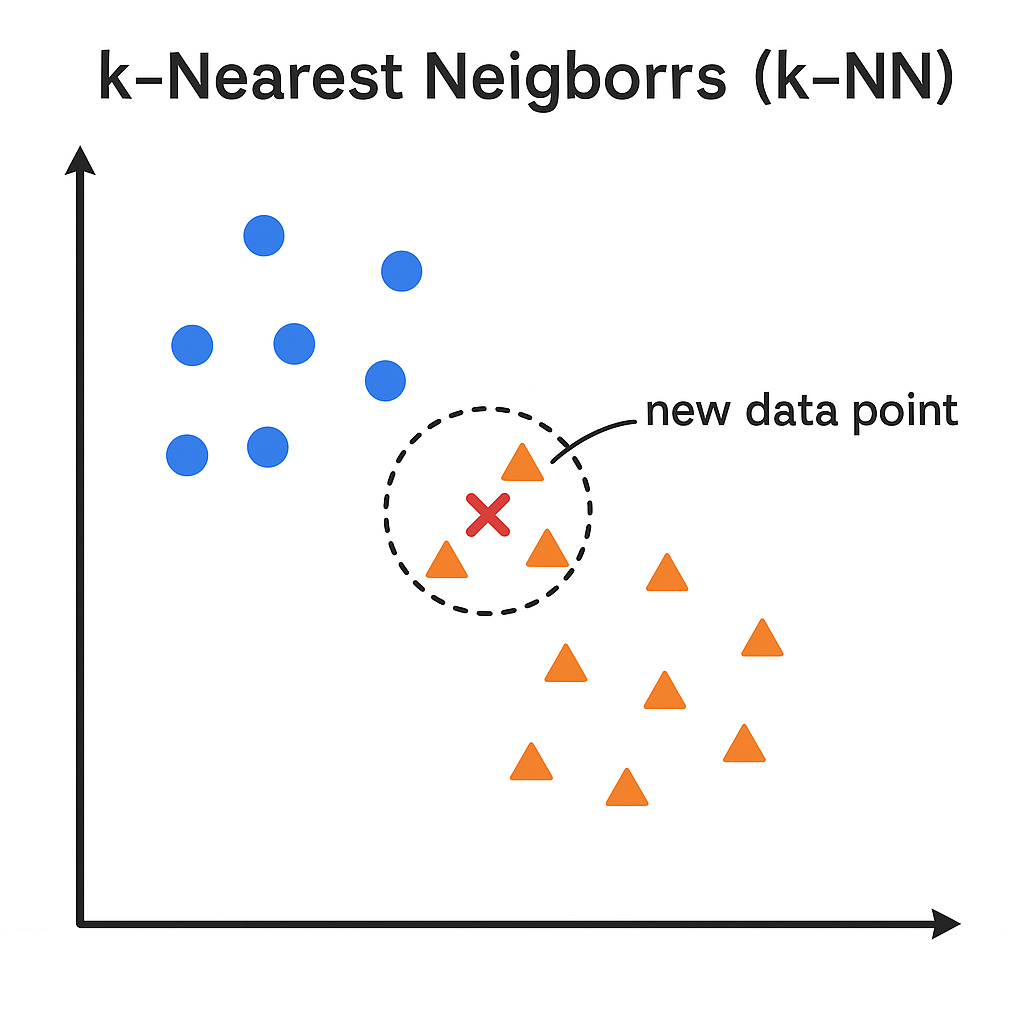

In [ ]:
b_knn_1 = KNeighborsClassifier(n_neighbors=1)
b_knn_2 = KNeighborsClassifier(n_neighbors=2)
b_knn_3 = KNeighborsClassifier(n_neighbors=3)
b_knn_5 = KNeighborsClassifier(n_neighbors=5)
b_knn_10 = KNeighborsClassifier(n_neighbors=10)

b_knns = [b_knn_1, b_knn_2, b_knn_3, b_knn_5, b_knn_10]

In [ ]:
h_knn_1 = KNeighborsClassifier(n_neighbors=1)
h_knn_2 = KNeighborsClassifier(n_neighbors=2)
h_knn_3 = KNeighborsClassifier(n_neighbors=3)
h_knn_5 = KNeighborsClassifier(n_neighbors=5)
h_knn_10 = KNeighborsClassifier(n_neighbors=10)

h_knns = [h_knn_1, h_knn_2, h_knn_3, h_knn_5, h_knn_10]

### Árboles de decisión
Los árboles de decisión son modelos de clasificación y regresión que dividen el espacio de características en regiones homogéneas basadas en las características de los datos. Los principales hiperparámetros a ajustar en un modelo de árbol de decisión son:

* criterion: Función para medir la calidad de una división. Las opciones comunes son "gini" para el índice de Gini y "entropy" para la ganancia de información.
* max_depth: Profundidad máxima del árbol. Limitar la profundidad puede ayudar a prevenir el sobreajuste.
* min_samples_split: Número mínimo de muestras necesarias para dividir un nodo. Un valor más alto puede llevar a árboles más generales.
* min_samples_leaf: Número mínimo de muestras que debe tener un nodo hoja. Un valor más alto puede suavizar el modelo.
* max_features: Número máximo de características a considerar para encontrar la mejor división. Puede ser un número entero, un valor flotante (fracción de características), "auto" (todas las características), "sqrt" (raíz cuadrada del número de características) o "log2" (logaritmo en base 2 del número de características).
* splitter: Estrategia utilizada para elegir la división en cada nodo. Las opciones son "best" para elegir la mejor división y "random" para elegir la mejor división aleatoria.

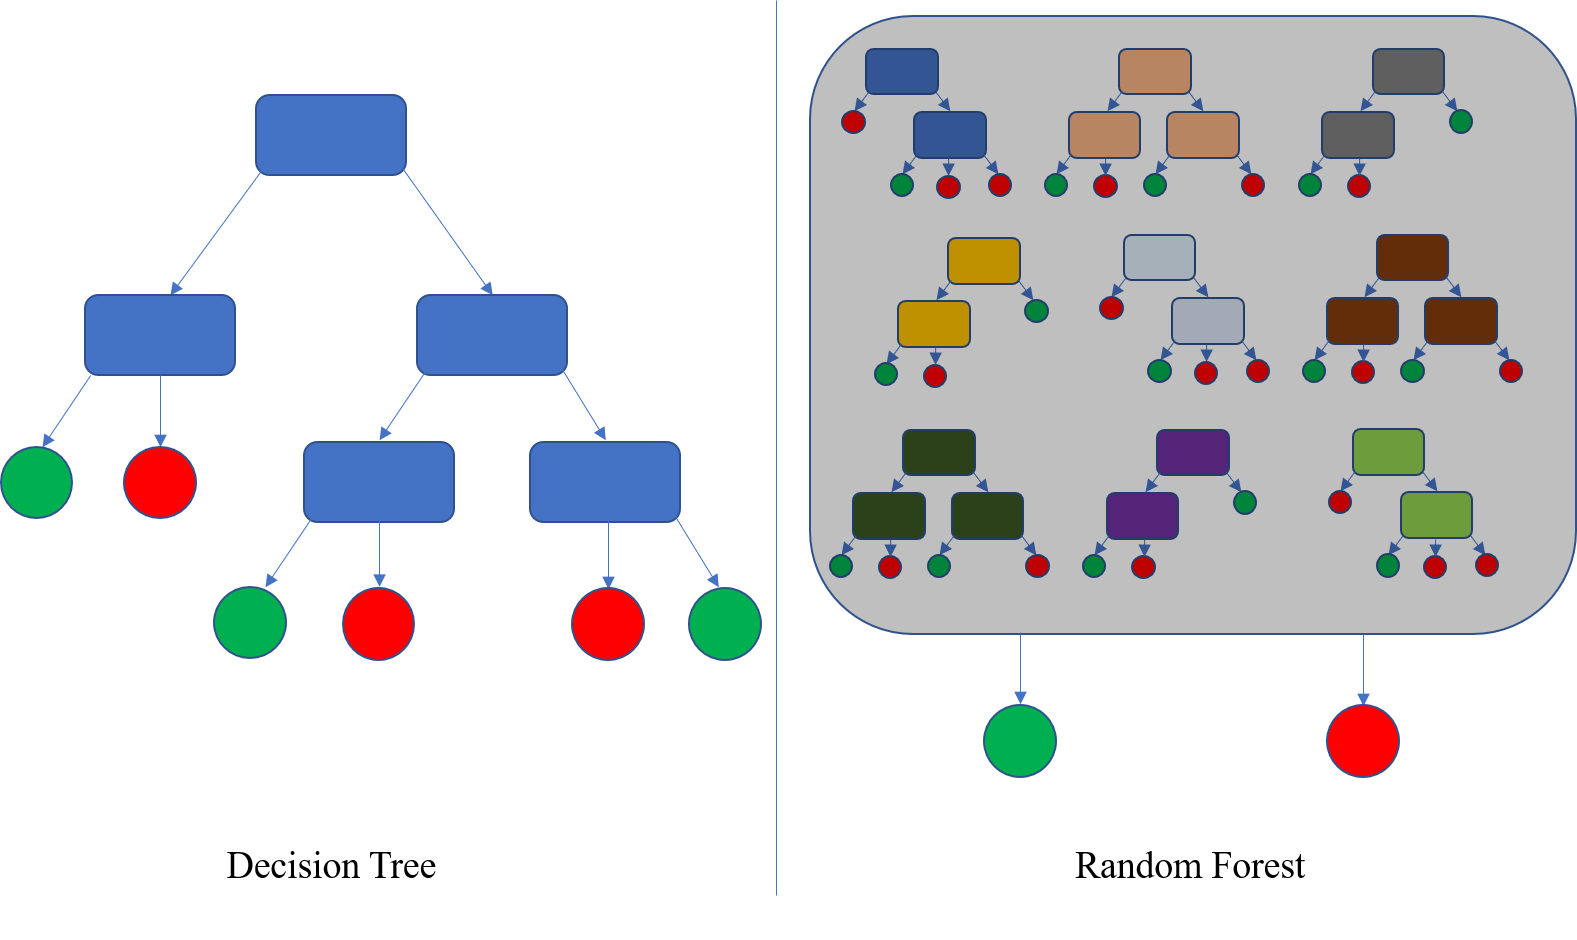

In [ ]:
b_dt_1 = DecisionTreeClassifier()
b_dt_2 = DecisionTreeClassifier(criterion='entropy', random_state=42) # Criterio distinto
b_dt_3 = DecisionTreeClassifier(max_depth=3, random_state=42) # Límite de profundidad
b_dt_4 = DecisionTreeClassifier(min_samples_split=10, random_state=42) # Número de muestras para dividir un nodo
b_dt_5 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42) # Número mínimo de muestras en una hoja

b_dts = [b_dt_1, b_dt_2, b_dt_3, b_dt_4, b_dt_5]

In [ ]:
h_dt_1 = DecisionTreeClassifier()
h_dt_2 = DecisionTreeClassifier(criterion='entropy', random_state=42) # Criterio distinto
h_dt_3 = DecisionTreeClassifier(max_depth=3, random_state=42) # Límite de profundidad
h_dt_4 = DecisionTreeClassifier(min_samples_split=10, random_state=42) # Número de muestras para dividir un nodo
h_dt_5 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42) # Número mínimo de muestras en una hoja

h_dts = [h_dt_1, h_dt_2, h_dt_3, h_dt_4, h_dt_5]

### Random Forest
El algoritmo de bosque aleatorio (Random Forest) es un conjunto de árboles de decisión que se entrenan de manera independiente y luego combinan sus predicciones para mejorar la precisión y reducir el sobreajuste. Los principales hiperparámetros a ajustar en un modelo de Random Forest son:

* n_estimators: Número de árboles en el bosque. Un valor más alto generalmente mejora el rendimiento, pero también aumenta el tiempo de entrenamiento.
* criterion: Función para medir la calidad de una división. Las opciones comunes son "gini" para el índice de Gini y "entropy" para la ganancia de información.
* max_depth: Profundidad máxima de los árboles. Limitar la profundidad puede ayudar a prevenir el sobreajuste.
* min_samples_split: Número mínimo de muestras necesarias para dividir un nodo. Un valor más alto puede llevar a árboles más generales.
* min_samples_leaf: Número mínimo de muestras que debe tener un nodo hoja. Un valor más alto puede suavizar el modelo.
* max_features: Número máximo de características a considerar para encontrar la * mejor división. Puede ser un número entero, un valor flotante (fracción de características), "auto" (todas las características), "sqrt" (raíz cuadrada del número de características) o "log2" (logaritmo en base 2 del número de características).
* bootstrap: Si se deben usar muestras con reemplazo al construir los árboles. El valor por defecto es True.

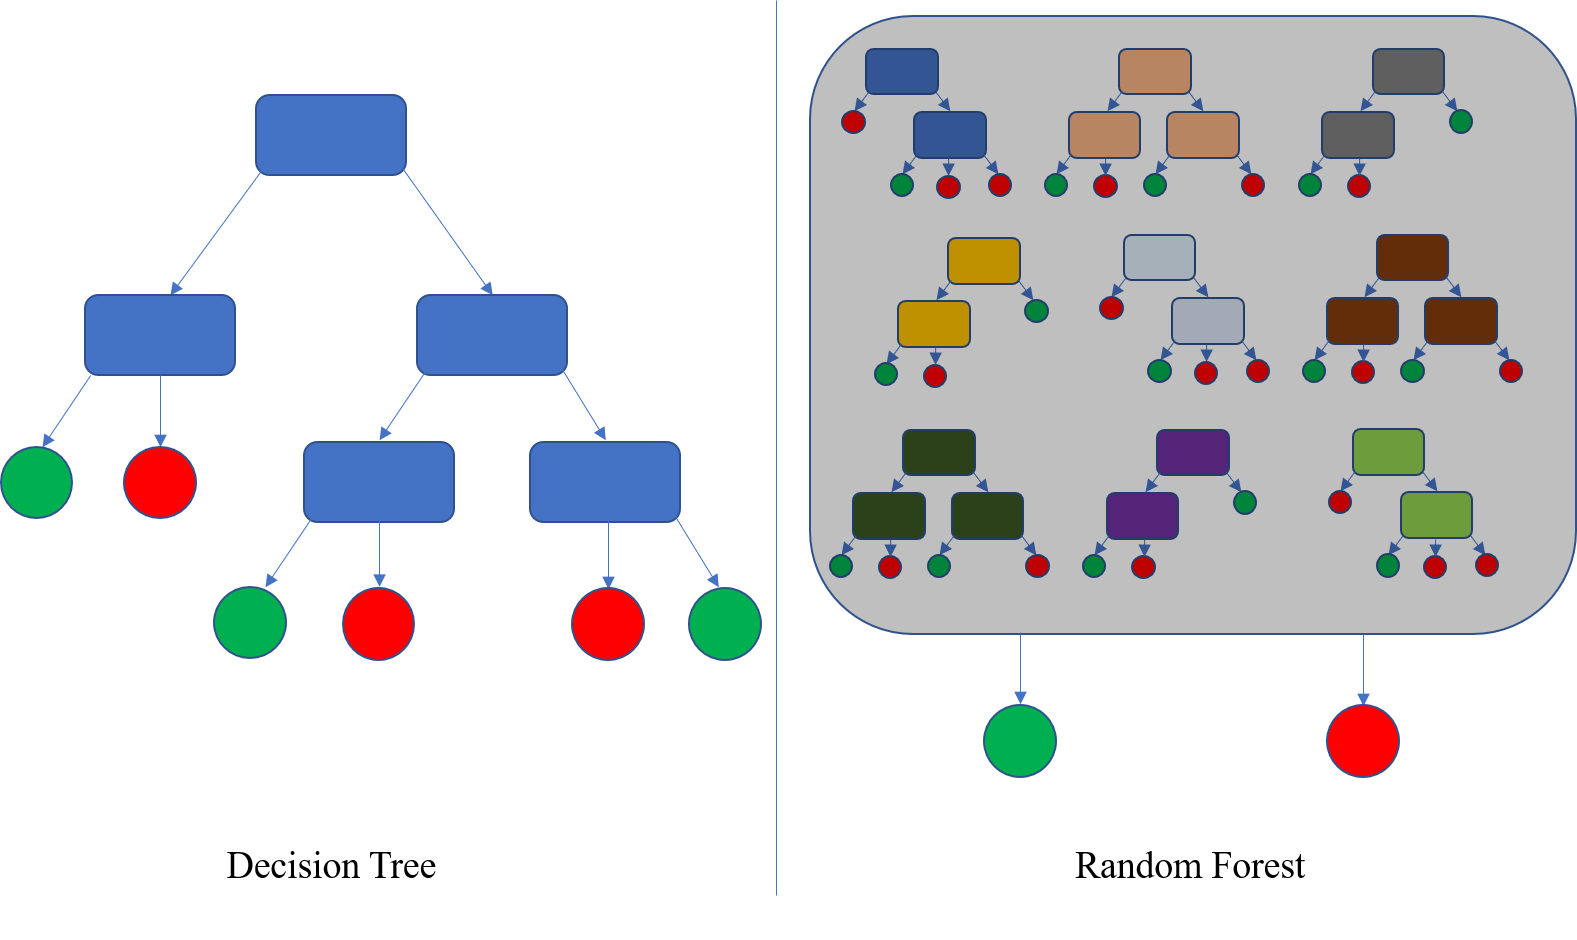

In [ ]:
b_rf_1 = RandomForestClassifier()
b_rf_2 = RandomForestClassifier(n_estimators=100, random_state=42) # Número de árboles
b_rf_3 = RandomForestClassifier(criterion='entropy', random_state=42) # Criterio distinto
b_rf_4 = RandomForestClassifier(max_depth=3, random_state=42) # Límite de profundidad
b_rf_5 = RandomForestClassifier(min_samples_split=10, random_state=42) # Número de muestras para dividir un nodo

b_rfs = [b_rf_1, b_rf_2, b_rf_3, b_rf_4, b_rf_5]

In [ ]:
h_rf_1 = RandomForestClassifier()
h_rf_2 = RandomForestClassifier(n_estimators=100, random_state=42) # Número de árboles
h_rf_3 = RandomForestClassifier(criterion='entropy', random_state=42) # Criterio distinto
h_rf_4 = RandomForestClassifier(max_depth=3, random_state=42) # Límite de profundidad
h_rf_5 = RandomForestClassifier(min_samples_split=10, random_state=42) # Número de muestras para dividir un nodo

h_rfs = [h_rf_1, h_rf_2, h_rf_3, h_rf_4, h_rf_5]

### Redes de neuronas
Las redes neuronales, específicamente el clasificador de perceptrón multicapa (MLPClassifier) en scikit-learn, son modelos de aprendizaje supervisado que pueden aprender relaciones no lineales complejas. Los principales hiperparámetros a ajustar en un modelo de red neuronal son:

* hidden_layer_sizes: Tamaño de las capas ocultas. Es una tupla donde cada elemento representa el número de neuronas en una capa oculta. Por ejemplo, (100,) representa una sola capa oculta con 100 neuronas.
* activation: Función de activación para las capas ocultas. Las opciones comunes son "identity", "logistic", "tanh" y "relu".
solver: Algoritmo para la optimización del peso. Las opciones son "lbfgs", "sgd" y "adam".
* alpha: Parámetro de regularización L2 (penalización).
* batch_size: Tamaño de los lotes para el optimizador. Si se establece en "auto", se utilizará min(200, n_samples).
* learning_rate: Programa de actualización de la tasa de aprendizaje. Las opciones son "constant", "invscaling" y "adaptive".
* learning_rate_init: Tasa de aprendizaje inicial utilizada. Controla la magnitud de la actualización de los pesos.
* max_iter: Número máximo de iteraciones. Es el número de épocas para el optimizador.
* random_state: Semilla para la generación de números aleatorios para la inicialización de los pesos y el orden de los datos.

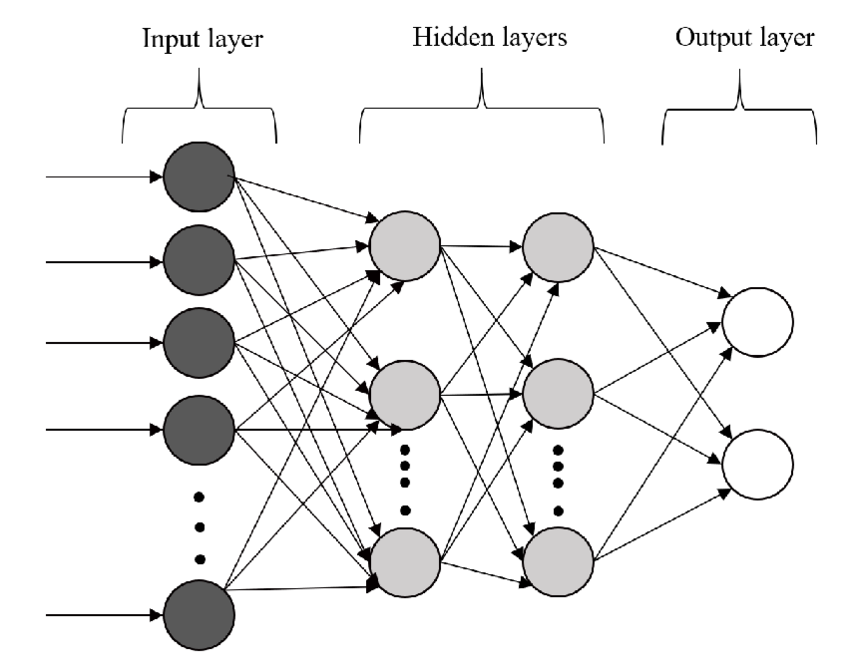

In [ ]:
b_rn_1 = MLPClassifier()
b_rn_2 = MLPClassifier(hidden_layer_sizes=(100,), random_state=42) # Tamaño de capas ocultas
b_rn_3 = MLPClassifier(activation='relu', random_state=42) # Función de activación
b_rn_4 = MLPClassifier(solver='adam', random_state=42) # Algoritmo de optimización
b_rn_5 = MLPClassifier(hidden_layer_sizes=(32, 2), random_state=42) # Tamaño de capa oculta

b_rns = [b_rn_1, b_rn_2, b_rn_3, b_rn_4, b_rn_5]

In [ ]:
h_rn_1 = MLPClassifier()
h_rn_2 = MLPClassifier(hidden_layer_sizes=(100,), random_state=42) # Tamaño de capas ocultas
h_rn_3 = MLPClassifier(activation='relu', random_state=42) # Función de activación
h_rn_4 = MLPClassifier(solver='adam', random_state=42) # Algoritmo de optimización
h_rn_5 = MLPClassifier(hidden_layer_sizes=(32, 2), random_state=42) # Tamaño de capa oculta

h_rns = [h_rn_1, h_rn_2, h_rn_3, h_rn_4, h_rn_5]

# Proceso de entrenamiento y evaluación

A continuación se llevará a cabo el entrenamiento de forma iterativa para poder obtener un modelo que satisfaga las necesidades del problema.

Para ello se le presentarán los patrones de los conjuntos de entrenamiento a los diferentes algoritmos con el objetivo de conocer cual es el mejor.

Los patrones del conjunto de validación serán los que guíen el entrenamiento.

Los patrones del conjunto de test serán los encargados de definir las métricas de cada uno de los modelos.

En esta fase es muy costosa tanto en tiempo como en cómputo, lo que es algo a tener en cuenta.

En cuanto a las principales métricas destacan:

* Precisión (Accuracy). Proporción de predicciones correctas sobre el total de predicciones.
* Precisión (Precision): Proporción de verdaderos positivos sobre el total de predicciones positivas.
* Sensibilidad (Recall): Proporción de verdaderos positivos sobre el total de positivos reales.
* Puntuación F1 (F1-Score): Media armónica de la precisión y la sensibilidad.

Existen otras métricas pero estas son las más relevantes normalmente.

Otro concepto a destacar es la matriz de confusión, que permite visualizar el rendimiento del modelo de clasificación. Muestra el número de predicciones correctas e incorrectas desglosadas por cada clase.
La matriz de confusión tiene la siguiente estructura:

                   |Predicción Positiva        |Predicción Negativa
    |Real Positivo |Verdaderos Positivos (TP)  |Falsos Negativos (FN)
    |Real Negativo |Falsos Positivos (FP)	  |Verdaderos Negativos (TN)

Este entrenamiento será realizado para cada uno de los datasets por separado y se obtendrán los resultados necesarios.


In [ ]:
def obtain_metrics(model, train_data, test_data, target):
  # Entrenar el modelo
  model.fit(train_data.drop(target, axis=1), train_data[target])
  accuracy = model.score(test_data.drop(target, axis=1), test_data[target])
  precission = precision_score(test_data[target], model.predict(test_data.drop(target, axis=1)), average='weighted')
  recall = recall_score(test_data[target], model.predict(test_data.drop(target, axis=1)), average='weighted')
  f1 = f1_score(test_data[target], model.predict(test_data.drop(target, axis=1)), average='weighted')
  confusion = confusion_matrix(test_data[target], model.predict(test_data.drop(target, axis=1)))

  return accuracy, precission, recall, f1, confusion

## Breast Cancer

Entrenamos los diferentes modelos para ver las métricas que ofrecen

In [ ]:
for i, knn in enumerate(b_knns):
    print(f"--- KNN Model {i+1} ---")
    accuracy, precision, recall, f1, confusion = obtain_metrics(knn, b_train, b_test, b_target_col_name)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    print("Confusion Matrix:")
    print(confusion)

    # Plotting the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=np.unique(b_test[b_target_col_name]),
                yticklabels=np.unique(b_test[b_target_col_name]))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for KNN Model {i+1}')
    plt.show()
    print("-" * 30)

In [ ]:
for i, dt in enumerate(b_dts):
    print(f"--- Decission Tree Model {i+1} ---")
    accuracy, precision, recall, f1, confusion = obtain_metrics(dt, b_train, b_test, b_target_col_name)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    print("Confusion Matrix:")
    print(confusion)

    # Plotting the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=np.unique(b_test[b_target_col_name]),
                yticklabels=np.unique(b_test[b_target_col_name]))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for DT Model {i+1}')
    plt.show()
    print("-" * 30)

In [ ]:
for i, rf in enumerate(b_rfs):
    print(f"--- Random Forest Model {i+1} ---")
    accuracy, precision, recall, f1, confusion = obtain_metrics(rf, b_train, b_test, b_target_col_name)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    print("Confusion Matrix:")
    print(confusion)

    # Plotting the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=np.unique(b_test[b_target_col_name]),
                yticklabels=np.unique(b_test[b_target_col_name]))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for RF Model {i+1}')
    plt.show()
    print("-" * 30)

In [ ]:
for i, rn in enumerate(b_rns):
    print(f"--- Artificial Neural Network Model {i+1} ---")
    accuracy, precision, recall, f1, confusion = obtain_metrics(rn, b_train, b_test, b_target_col_name)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    print("Confusion Matrix:")
    print(confusion)

    # Plotting the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=np.unique(b_test[b_target_col_name]),
                yticklabels=np.unique(b_test[b_target_col_name]))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for ANN Model {i+1}')
    plt.show()
    print("-" * 30)

### Heart disease

A continuación realizaremos la misma tarea para este dataset

In [ ]:
for i, knn in enumerate(h_knns):
    print(f"--- KNN Model {i+1} ---")
    accuracy, precision, recall, f1, confusion = obtain_metrics(knn, b_train, b_test, b_target_col_name)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    print("Confusion Matrix:")
    print(confusion)

    # Plotting the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=np.unique(b_test[b_target_col_name]),
                yticklabels=np.unique(b_test[b_target_col_name]))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for KNN Model {i+1}')
    plt.show()
    print("-" * 30)

In [ ]:
for i, dt in enumerate(h_dts):
    print(f"--- Decission Tree Model {i+1} ---")
    accuracy, precision, recall, f1, confusion = obtain_metrics(dt, b_train, b_test, b_target_col_name)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    print("Confusion Matrix:")
    print(confusion)

    # Plotting the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=np.unique(b_test[b_target_col_name]),
                yticklabels=np.unique(b_test[b_target_col_name]))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for DT Model {i+1}')
    plt.show()
    print("-" * 30)

In [ ]:
for i, rf in enumerate(h_rfs):
    print(f"--- Random Forest Model {i+1} ---")
    accuracy, precision, recall, f1, confusion = obtain_metrics(rf, b_train, b_test, b_target_col_name)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    print("Confusion Matrix:")
    print(confusion)

    # Plotting the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=np.unique(b_test[b_target_col_name]),
                yticklabels=np.unique(b_test[b_target_col_name]))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for RF Model {i+1}')
    plt.show()
    print("-" * 30)

In [ ]:
for i, rn in enumerate(h_rns):
    print(f"--- Artificial Neural Network Model {i+1} ---")
    accuracy, precision, recall, f1, confusion = obtain_metrics(rn, b_train, b_test, b_target_col_name)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    print("Confusion Matrix:")
    print(confusion)

    # Plotting the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=np.unique(b_test[b_target_col_name]),
                yticklabels=np.unique(b_test[b_target_col_name]))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for ANN Model {i+1}')
    plt.show()
    print("-" * 30)

## Deep learning

Deep learning es una subdisciplina del aprendizaje automático basada en redes neuronales artificiales para modelar y entender patrones complejos en grandes conjuntos de datos. Estas redes están inspiradas en la estructura y el funcionamiento del cerebro humano, y consisten en múltiples capas de nodos (neuronas) que procesan la información de manera jerárquica. A medida que la información pasa por cada capa, la red aprende a extraer características cada vez más abstractas y relevantes.

Un ejemplo destacado de deep learning es su aplicación en el reconocimiento de imágenes. Las redes neuronales convolucionales (CNNs) se utilizan para identificar objetos, personas y escenas en fotografías y videos con una precisión sorprendente. Esta tecnología es fundamental en sistemas de seguridad, donde se emplea para detectar intrusos o reconocer rostros, así como en aplicaciones de redes sociales, donde ayuda a etiquetar automáticamente a personas en fotos.

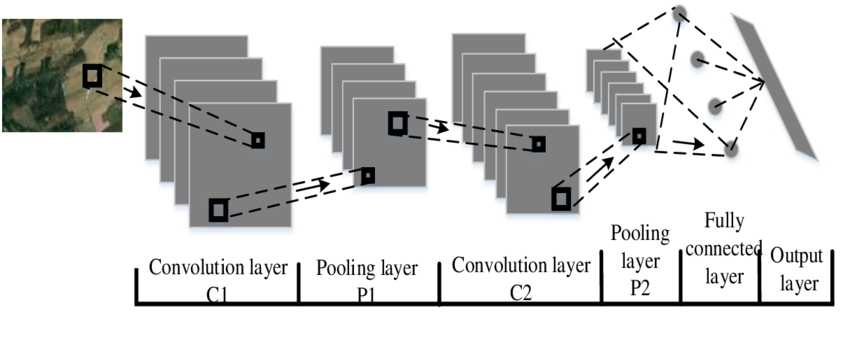

Otro campo donde el deep learning ha demostrado ser revolucionario es en el procesamiento del lenguaje natural (NLP). Modelos como GPT-4, en el que estoy basado, pueden entender y generar texto de manera coherente y contextualmente relevante. Esto tiene aplicaciones en asistentes virtuales, recomendaciones clínicas, traducción automática, y análisis de sentimientos, permitiendo una interacción más natural y eficiente entre humanos y máquinas.

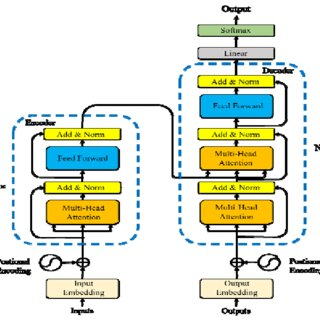

Otro caso de uso sería la conducción autónoma. Los vehículos autónomos emplean redes neuronales profundas para interpretar datos de sensores y cámaras, tomar decisiones en tiempo real y navegar de manera segura en entornos complejos. Esta tecnología promete transformar el transporte, mejorando la seguridad vial y reduciendo la congestión del tráfico.

Un problema que se puede obtener a la hora de entrenar un modelo es el __sobreentrenamiento__, que se da cuando un modelo no es capaz de generalizar y lo único que realiza es aprenderse los patrones. Para tratar de paliar este problema entra en juego el conjunto de validación, encargado de guiar el entrenamiento para pararlo en el momento adecuado. Es importante mencionar que, a pesar de que actúa como test en cada ciclo de entrenamiento, este no se utiliza a la hora de probar el modelo final.

In [ ]:
# Realizamos los imports necesarios
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

Un ejemplo sencillo es la detección de números en imágenes, la base de datos de mnist de keras es muy útil para adentrarse en este mundo tan complejo.

En este punto entran en juego las imágenes, una matriz de valores que representan el color. Estas imagenes pueden estar en escala de grises o en RGB. Para el ejemplo actual, usaremos la escala de grises por sencillez.

In [ ]:
# Cargar el dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocesamiento de los datos
# Normalizar las imágenes de 0-255 a 0-1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Construir el modelo de red neuronal profunda
model = Sequential([
    # Capa de aplanamiento para convertir la imagen 2D en un vector 1D
    Flatten(input_shape=(28, 28)),
    # Capa densa (completamente conectada) con 128 neuronas y activación ReLU
    Dense(128, activation='relu'),
    # Capa densa de salida con 10 neuronas (una por cada dígito) y activación softmax para clasificación multiclase
    Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
# Se entrena con los datos de entrenamiento y se valida con un 20% de los datos de entrenamiento
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

# Evaluar el modelo en el conjunto de test
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Mostrar algunas predicciones
predictions = model.predict(x_test[:10])
predicted_classes = tf.argmax(predictions, axis=1)

print("\nPredicciones para las primeras 10 imágenes del conjunto de test:")
for i in range(10):
    print(f"Imagen {i}: Predicción = {predicted_classes.numpy()[i]}, Real = {y_test[i]}")

# Visualizar una de las imágenes con su predicción
plt.figure(figsize=(2, 2))
plt.imshow(x_test[0], cmap='gray')
plt.title(f'Predicción: {predicted_classes.numpy()[0]}, Real: {y_test[0]}')
plt.axis('off')
plt.show()

# Mostrar las métricas de entrenamiento y validación a lo largo de las épocas
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
